<a href="https://colab.research.google.com/github/Akshay-Rajesh/DSA_Assignments_AkshaY/blob/main/Case_Study_10_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score , accuracy_score , recall_score

In [2]:
data=pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# we can check import features of our data 
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Checking the above table we can see feature veil-type has only one unique value so it is not required for our model creation , we can drop it .

In [36]:
# we can take our X and y values
X = data.drop(['class', 'veil-type'], axis=1)
y = data['class']

In [34]:
# we have categorical values so we can do One hot encoder
X = pd.get_dummies(data = X, drop_first=True)

In [35]:
# we can split in to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [38]:
# Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("accuracy score is " , accuracy_score(y_test,y_pred_lr))


accuracy score is  1.0


In [39]:
confusion_matrix(y_test,y_pred_lr)

array([[843,   0],
       [  0, 782]])

From the above we can see our model is performing very well and it is prediction all values correctly as per the confusion matrix .

In [40]:
# Classification report of Logistic Regression Classifier
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [43]:
# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("accuracy score is " , accuracy_score(y_test,y_pred_lr))

accuracy score is  1.0


In [44]:
confusion_matrix(y_test,y_pred_nb)

array([[778,  65],
       [  0, 782]])

In [45]:
# Classification report of Naive Bayes Classifier

print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           e       1.00      0.92      0.96       843
           p       0.92      1.00      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



We can see some of our predictions are not accurateas per the confusion matrix

In [50]:
# Decision Tree Classification
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [52]:
print("accuracy score is " , accuracy_score(y_test,y_pred_dt))
confusion_matrix(y_test,y_pred_dt)

accuracy score is  1.0


array([[843,   0],
       [  0, 782]])

We can see again our model is very good .

In [54]:
#Random forest classification
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [55]:
print("accuracy score is " , accuracy_score(y_test,y_pred_rf))
confusion_matrix(y_test,y_pred_rf)

accuracy score is  1.0


array([[843,   0],
       [  0, 782]])

Gain our model is perfect with great accuracy .

In [56]:
# Classification report of Random Forest Classifier

print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [57]:
#KNN classifier

from sklearn.neighbors import KNeighborsClassifier
# we have to find optimum k values 

acc_values =[]
neighbors = np.arange(1,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k , metric="minkowski")
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  acc_values.append(acc)

  #When we do KNN method , first we have to find the correct k value to be used for our model , above code does that job

In [58]:
print(acc_values)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9993846153846154]


Text(0, 0.5, 'Accuracy')

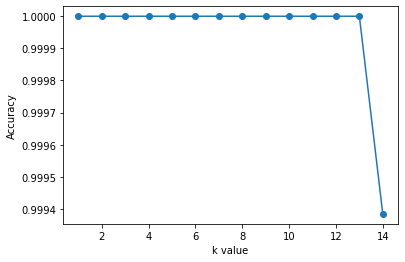

In [59]:
plt.plot(neighbors,acc_values , "o-")
plt.xlabel("k value")
plt.ylabel("Accuracy")

In [63]:
# from the above graph it is clear that we get highest accuracy when we use k value as 1
# We create a model using k = 5
classifier = KNeighborsClassifier(n_neighbors=1 , metric="minkowski")
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [64]:
print("Accuracy is :'" , accuracy_score(y_test,y_pred_knn))


Accuracy is :' 1.0


In [66]:
# Classification report of KNN Classifier

print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



100% accuracy again

We can see all of our models are performing very well .

---

